In [29]:
pip install ucimlrepo

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
from ucimlrepo import fetch_ucirepo
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import numpy as np
import pandas as pd

# Fetch dataset
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)

# Data (as pandas dataframes)
X = predict_students_dropout_and_academic_success.data.features
y = predict_students_dropout_and_academic_success.data.targets

# Get feature names from metadata
feature_names = predict_students_dropout_and_academic_success.metadata.features

# Create dataframe for X and y
df = pd.DataFrame(data=X, columns=feature_names)
df['Target'] = y  # Adding the target variable to the dataframe

#make a copy of the dataframe called df2 which will be modified
df2 = df.copy()

#print(df2)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
#print out current column names
df2.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Marital Status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd s

In [32]:
# redo mapping for some of the variables that have multiple categories so that they can be analyzed and categorized by Apriori Code
# Define function to create new marital category
def create_marital_category(status):
    if status in [1]:
        return "Single"
    elif status in [2, 5]:
        return "Married"
    elif status == 3:
        return "Widower"
    elif status in [4, 6]:
        return "Divorced"


# Apply function to create new category column
df2['Marital_Category'] = df2['Marital Status'].apply(create_marital_category)

# Drop the old column
df2.drop('Marital Status', axis=1, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
def create_gender_category(status):
    if status == 1:
        return "Male"
    else:
        return "Female"


# Create a new column with the categorized gender
df2['Gender_Category'] = df2['Gender'].apply(create_gender_category)

#drop the old column
df2.drop('Gender', axis=1, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
def create_nightschool_category(status):
    if status == 1:
        return "Day School"
    else:
        return "Night School"

# Create a new column with the categorized attendance type
df2['Day/Night Attendance_Category'] = df2['Daytime/evening attendance'].apply(create_nightschool_category)

#drop the old column
df2.drop('Daytime/evening attendance', axis=1, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
# We have 7 fields which only have yes/no as their values
#this code will transform all of them at the same time

def create_binary_category(status):
    if status == 1:
        return "Yes"
    else:
        return "No"

#create a new column
df2['Displaced_Category'] = df2['Displaced'].apply(create_binary_category)

#drop the old column
df2.drop('Displaced', axis=1, inplace=True)

#create a new column
df2['SpecialNeeds_Category'] = df2['Educational special needs'].apply(create_binary_category)

#drop the old column
df2.drop('Educational special needs', axis=1, inplace=True)

#create a new column
df2['Debtor_Category'] = df2['Debtor'].apply(create_binary_category)

#drop the old column
df2.drop('Debtor', axis=1, inplace=True)



#create a new column
df2['Tuition fees up to date_Category'] = df2['Tuition fees up to date'].apply(create_binary_category)

#drop the old column
df2.drop('Tuition fees up to date', axis=1, inplace=True)


#create a new column
df2['Scholarship holder_Category'] = df2[ 'Scholarship holder'].apply(create_binary_category)

#drop the old column
df2.drop( 'Scholarship holder', axis=1, inplace=True)


#create a new column
df2['International_Category'] = df2[ 'International'].apply(create_binary_category)
#drop the old column
df2.drop( 'International', axis=1, inplace=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
def create_nationality_category(status):
    if status in [2, 6, 11, 13, 14]:
        return "Western European"
    elif status in [21, 22, 24, 25, 26]:
        return "African"
    elif status == 32:
        return "Turkish"
    elif status in [17, 62, 100, 103, 105]:
        return "Eastern European"
    elif status in [41, 101, 108, 109]:
        return "Latin American"
    elif status == 1:
        return "Portugese"

# Apply function to create new category column
df2['Nationality_Category'] = df2['Nacionality'].apply(create_nationality_category)

# Handle missing or undefined country codes
df2['Nationality_Category'].fillna('Other', inplace=True)

# Drop the old column
df2.drop('Nacionality', axis=1, inplace=True)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
def create_application_category(status):
    if status in [1, 17, 18]:
        return "General Contingent"
    elif status in [5, 16]:
        return "Special Contingent"
    elif status in [2, 10, 26, 27 ]:
        return "Ordinance Related"
    elif status in [42, 43, 51, 57]:
        return "Course Change/ Transfer"
    elif status in [7, 15, 44, 53]:
        return "Other Degree Holders"
    elif status in [39]:
        return "Over 23"
    else:
        return "Other"


# Create a new column with the categorized application mode
df2['Application_Mode_Category'] = df2['Application mode'].apply(create_application_category)

# Drop the old column
df2.drop('Application mode', axis=1, inplace=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
def create_application_order_category(status):
    if status in [0, 1, 2, 3 ]:
        return "Top 3 Choice"
    elif status in [4, 5, 6]:
        return "Choice 4 to 6"
    elif status in [7, 8, 9]:
        return "Choice 4 to 6"
    else:
        return "Other"

# Create a new column with the categorized application order
df2['Application_Order_Category'] = df2['Application order'].apply(create_application_order_category)


#drop the old column
df2.drop('Application order', axis=1, inplace=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
# Define a function to categorize course codes
def create_course_category(code):
    if code == 33:
        return "Technology/Engineering"
    elif code in [171, 9070]:
        return "Design/Multimedia"
    elif code == 8014:
        return "Social Services"
    elif code in [9003, 9130]:
        return "Agriculture"
    elif code == 9085:
        return "Veterinary"
    elif code in [9147, 9991]:
        return "Management"
    elif code == 9254:
        return "Tourism"
    elif code in [9500, 9556]:
        return "Healthcare"
    elif code == 9670:
        return "Marketing/Advertising"
    elif code == 9773:
        return "Journalism/Communication"
    elif code == 9853:
        return "Education"
    else:
        return "Other"

# Apply the function to create a new column with the categorized course
df2['Course_Category'] = df2['Course'].apply(create_course_category)

# Drop the old 'Course' column
df2.drop('Course', axis=1, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
# Define a function to categorize previous qualifications

def categorize_previous_qualification(qualification):
    if qualification in [39, 42]:
        return "Professional/ Specialized Higher Course"

    elif qualification in [38]:
        return "Basic Education up to 8th Grade"

    elif qualification in [10, 12, 14, 19]:
        return "Incomplete Schooling (9th-11th Grade)"

    elif qualification in [6, 9]:
        return "Incomplete Schooling (12th Grade or Eqivalent)"

    elif qualification in [1]:
        return "Complete Secondary School or Eqivalent"

    elif qualification in [2, 3, 40]:
        return "Higher Education - Bachelor's Degree"
    elif qualification in [4, 43]:
        return "Higher Education - Master's Degree"
    elif qualification in [5, 44]:
        return "Higher Education - Doctorate"
    else:
        return "Other"

# Apply the function to create a new column with the categorized education level
df2['Previous_qualification_Category'] = df2['Previous qualification'].apply(categorize_previous_qualification)

# Drop the old 'Previous qualification' column
df2.drop('Previous qualification', axis=1, inplace=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
# Define a function to categorize qualifications


def categorize_qualification(qualification):
    if qualification in [22]:
        return "Technical Degree"

    elif qualification in [18, 31, 33]:
        return "General Education Course"

    elif qualification in [39, 41, 42]:
        return "Professional/ Specialized Higher Course"

    elif qualification in [2, 3, 40]:
        return "Higher Education - Bachelor's Degree"
    elif qualification in [4, 43]:
        return "Higher Education - Master's Degree"
    elif qualification in [5, 44]:
        return "Higher Education - Doctorate"

    elif qualification in [36, 37, 38 , 11, 26, 30]:
        return "Basic Education up to 8th Grade"

    elif qualification in [10, 12, 14, 19, 29]:
        return "Incomplete Schooling (9th-11th Grade)"

    elif qualification in [6, 9, 13, 25, 27]:
        return "Incomplete Schooling (12th Grade or Eqivalent)"
    elif qualification in [1, 20]:
        return "Complete Secondary School or Eqivalent"

    elif qualification == 34:
        return "Unknown"

    elif qualification == 35:
        return "Cannot Read or Write"
  #  else:
       # return "Other"

# Apply the function to create new columns with the categorized qualifications for mother and father
df2["Mother's Qualification_Category"] = df2["Mother's qualification"].apply(categorize_qualification)
df2["Father's Qualification_Category"] = df2["Father's qualification"].apply(categorize_qualification)


# Drop the old columns
df2.drop(["Mother's qualification", "Father's qualification"], axis=1, inplace=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
# Define a function to categorize occupations
def categorize_occupation(occupation_code):
    if occupation_code == 1:
        return "Student"
    elif occupation_code in [90, 99]:
        return "Other and Blank"
    elif occupation_code in [2, 121]:
        return "Intellectual and Scientific Specialists"
    elif occupation_code in [132, 122]:
        return"Health Professionals"
    elif occupation_code in [5, 154, 151, 153, 194]:
        return "Personal Services"
    elif occupation_code in [1, 112]:
        return "Managers and Directors"
    elif occupation_code in [3, 131, 134, 135]:
        return "Intermediate Professions"
    elif occupation_code in [4, 144, 141]:
        return "Office and Administrative"
    elif occupation_code in [124, 143]:
        return "Finance, Accounting and Data Professions"
    elif occupation_code in [10, 101, 102, 103]:
        return "Armed Forces"
    elif occupation_code in [6, 161, 163, 192]:
        return "Agricultural Workers"
    elif occupation_code in [8, 181, 182, 183]:
        return "Skilled Industrial Workers and Drivers"
    elif occupation_code in [7, 171, 193, 172, 174]:
        return "Construction and Electrical Workers"
    elif occupation_code in [114, 175, 195, 152]:
        return "Hotel, Food, Catering and Sellers"
    elif occupation_code == 9:
        return "Unskilled Workers"
    elif occupation_code == 123:
        return "Teachers"
    else:
        return "Unknown"


# Apply the function to create new columns with the categorized occupations for mother and father
df2["Mother's Occupation_Category"] = df2["Mother's occupation"].apply(categorize_occupation)
df2["Father's Occupation_Category"] = df2["Father's occupation"].apply(categorize_occupation)

# Handle missing or undefined mother/ father occupation codes
df2["Mother's Occupation_Category"].fillna('Other', inplace=True)
df2["Father's Occupation_Category"].fillna('Other', inplace=True)

# Drop the old columns
df2.drop(["Mother's occupation", "Father's occupation"], axis=1, inplace=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
# seperate the ages into bins
# Define the bins for different age groups
bins = [17, 21, 24, 27, 31, 40, float('inf')]  # 40+ will include all ages above 40

# Define labels for the age groups
labels = ['17-20', '21-23', '24-26', '27-30', '31-39', '40+']

# Create a new column 'Age Group' based on the bins and labels
df2['Age Group'] = pd.cut(df2['Age at enrollment'], bins=bins, labels=labels, right=False)

# Drop the 'Age at enrollment' column
df2.drop('Age at enrollment', axis=1, inplace=True)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
# look at values for Admission grade and decide how to break it down
minimum_grade = df2['Admission grade'].min()
maximum_grade = df2['Admission grade'].max()
median_grade = df2['Admission grade'].median()

print("Minimum Admission Grade:", minimum_grade)
print("Maximum Admission Grade:", maximum_grade)
print("Median Admission Grade:", median_grade)

#print(df2['Admission grade'].unique())

Minimum Admission Grade: 95.0
Maximum Admission Grade: 190.0
Median Admission Grade: 126.1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
# Define the bin edges based on percentiles
bin_edges = [0, 20, 40, 60, 80, 100]

# Define the bin labels
bin_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Bin the 'Admission grade' column
df2['Admission Grade_Category'] = pd.qcut(df2['Admission grade'], q=5, labels=bin_labels)

#nDrop the original 'Admission grade' column
df2.drop('Admission grade', axis=1, inplace=True)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
columns_to_remove = [
    'Previous qualification (grade)',
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)',
    'Unemployment rate',
    'Inflation rate',
    'GDP'
]

df2.drop(columns=columns_to_remove, inplace=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
df2.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Target', 'Marital_Category', 'Gender_Category',
       'Day/Night Attendance_Category', 'Displaced_Category',
       'SpecialNeeds_Category', 'Debtor_Category',
       'Tuition fees up to date_Category', 'Scholarship holder_Category',
       'International_Category', 'Nationality_Category',
       'Application_Mode_Category', 'Application_Order_Category',
       'Course_Category', 'Previous_qualification_Category',
       'Mother's Qualification_Category', 'Father's Qualification_Category',
       'Mother's Occupation_Category', 'Father's Occupation_Category',
       'Age Group', 'Admission Grade_Category'],
      dtype='object')

In [50]:
#One hot encode data

import pandas as pd

categorical_columns = ['Marital_Category', 'Gender_Category',
       'Day/Night Attendance_Category', 'Displaced_Category',
       'SpecialNeeds_Category', 'Debtor_Category',
       'Tuition fees up to date_Category', 'Scholarship holder_Category',
       'International_Category', 'Nationality_Category',
       'Application_Mode_Category', 'Application_Order_Category',
       'Course_Category', 'Previous_qualification_Category',
       "Mother's Qualification_Category", "Father's Qualification_Category",
       "Mother's Occupation_Category", "Father's Occupation_Category",
       'Age Group', 'Admission Grade_Category']

# Perform one-hot encoding
df2_encoded = pd.get_dummies(df2, columns=categorical_columns)

# Display the encoded DataFrame
print(df2_encoded)

        Target  Marital_Category_Divorced  Marital_Category_Married  \
0      Dropout                      False                     False   
1     Graduate                      False                     False   
2      Dropout                      False                     False   
3     Graduate                      False                     False   
4     Graduate                      False                      True   
...        ...                        ...                       ...   
4419  Graduate                      False                     False   
4420   Dropout                      False                     False   
4421   Dropout                      False                     False   
4422  Graduate                      False                     False   
4423  Graduate                      False                     False   

      Marital_Category_Single  Marital_Category_Widower  \
0                        True                     False   
1                        True

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
df2_encoded.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Target', 'Marital_Category_Divorced', 'Marital_Category_Married',
       'Marital_Category_Single', 'Marital_Category_Widower',
       'Gender_Category_Female', 'Gender_Category_Male',
       'Day/Night Attendance_Category_Day School',
       'Day/Night Attendance_Category_Night School', 'Displaced_Category_No',
       ...
       'Age Group_21-23', 'Age Group_24-26', 'Age Group_27-30',
       'Age Group_31-39', 'Age Group_40+', 'Admission Grade_Category_Very Low',
       'Admission Grade_Category_Low', 'Admission Grade_Category_Medium',
       'Admission Grade_Category_High', 'Admission Grade_Category_Very High'],
      dtype='object', length=124)

In [53]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import pandas as pd
from sklearn.model_selection import train_test_split

# df2_encoded is theDataFrame with one-hot encoded categorical variables
X = df2_encoded.drop(columns=['Target'], axis=1)
# Choose the target variable for analysis
y = df2_encoded['Target']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the classifier using the training dataset
clf.fit(X_train, y_train)

# Get feature names dynamically from the DataFrame
feature_names = list(X.columns)

# Get unique class names from the target variable
class_names = y.unique().astype(str)

# Export the decision tree to a Graphviz file
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=feature_names,
                           class_names=class_names,
                           filled=True, rounded=True,
                           special_characters=True)

# Visualize the graph
graph = graphviz.Source(dot_data)
graph.render("student_dropout_decision_tree", format='png')  # Saves the decision tree to a file

# Evaluate the model on the testing set
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.399252 to fit


Accuracy: 0.5129943502824859


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of elements in the decision tree: 2651
Number of elements in the pruned decision tree: 57


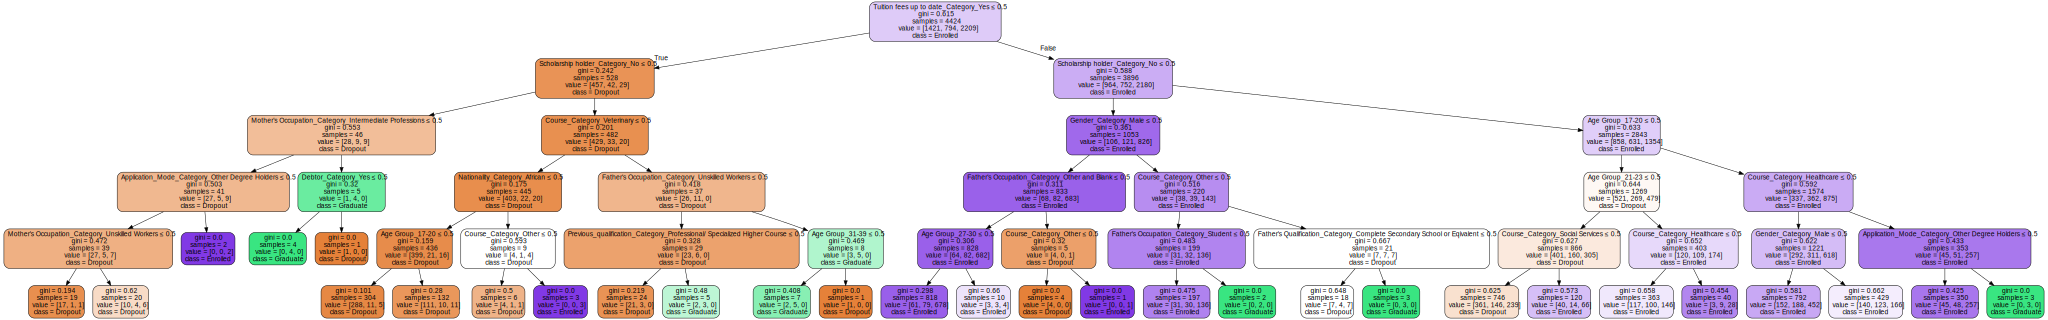

In [55]:
# Get the number of elements in the current decision tree
num_elements = clf.tree_.node_count
print("Number of elements in the decision tree:", num_elements)

# Calculate the number of elements to keep
num_elements_to_keep = int(num_elements * 0.3)  # Keep only 30% of the original size

# Prune the decision tree to reduce its size
# Prune by setting max depth
clf_pruned = DecisionTreeClassifier(max_depth=5)
clf_pruned.fit(X, y)

# Get the number of elements in the pruned decision tree
num_elements_pruned = clf_pruned.tree_.node_count
print("Number of elements in the pruned decision tree:", num_elements_pruned)


# Export the pruned decision tree to a Graphviz file
dot_data_pruned = export_graphviz(clf_pruned, out_file=None,
                                  feature_names=feature_names,
                                  class_names=class_names,
                                  filled=True, rounded=True,
                                  special_characters=True)

# Visualize the pruned decision tree
graph_pruned = graphviz.Source(dot_data_pruned)
graph_pruned.render("pruned_decision_tree", format='png')  # Saves the pruned decision tree to a file
graph_pruned

In [59]:
from sklearn.metrics import confusion_matrix

# Predict the target variable on the testing set
y_pred = clf_pruned.predict(X_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[189   1 126]
 [ 43   3 105]
 [ 50   0 368]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
#average=None to get precision for each class individually
precision = precision_score(y_test, y_pred, average=None)

# Calculate recall
#average=None to get recall for each class individually
recall = recall_score(y_test, y_pred, average=None)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.632768361581921
Precision: [0.67021277 0.75       0.61435726]
Recall: [0.59810127 0.01986755 0.88038278]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [65]:
from sklearn.metrics import classification_report

# Print classification report
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))


Decision Tree Classification Report:
              precision    recall  f1-score   support

     Dropout       0.67      0.60      0.63       316
    Graduate       0.75      0.02      0.04       151
    Enrolled       0.61      0.88      0.72       418

    accuracy                           0.63       885
   macro avg       0.68      0.50      0.46       885
weighted avg       0.66      0.63      0.57       885



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
